In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('air_quality_clean.csv')

In [3]:
df.head()

,Unnamed: 0,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,Ahmedabad,2015-01-01,51.84,290.00,0.92,18.22,17.15,44.03,0.92,27.64,85.00,0.0,0.02,0.0,291.0,NaN
1,1,Ahmedabad,2015-01-02,38.26,75.12,0.97,15.69,16.46,26.52,0.97,24.55,34.06,3.0,22.00,1.0,75.0,NaN
2,2,Ahmedabad,2015-01-03,53.84,135.13,17.40,19.30,29.70,33.37,2.00,28.00,30.70,3.0,22.00,1.0,135.0,NaN
3,3,Ahmedabad,2015-01-04,11.75,171.41,1.70,18.48,17.97,3.19,1.70,18.59,36.08,3.0,22.00,1.0,171.0,NaN
4,4,Ahmedabad,2015-01-05,31.80,290.00,22.10,21.42,37.76,28.76,2.00,28.00,39.31,3.0,22.00,1.0,489.0,NaN


In [4]:
df=df.drop(['Unnamed: 0','AQI_Bucket'],axis=1)

In [8]:
df.shape

(29531, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   Date     29531 non-null  object 
 2   PM2.5    29531 non-null  float64
 3   PM10     29531 non-null  float64
 4   NO       29531 non-null  float64
 5   NO2      29531 non-null  float64
 6   NOx      29531 non-null  float64
 7   NH3      29531 non-null  float64
 8   CO       29531 non-null  float64
 9   SO2      29531 non-null  float64
 10  O3       29531 non-null  float64
 11  Benzene  29531 non-null  float64
 12  Toluene  29531 non-null  float64
 13  Xylene   29531 non-null  float64
 14  AQI      29531 non-null  float64
 15  city1    0 non-null      object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# EDA

In [10]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,61.242101,113.148107,14.481171,27.158106,29.378239,21.407453,0.974862,11.549852,33.959433,1.103154,15.385836,0.245882,162.506078
std,42.991583,74.033002,12.171657,19.514389,22.511555,16.731101,0.608630,7.859094,19.859246,1.221499,10.013042,0.405182,135.142161
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,10.000000
25%,28.780000,56.280000,5.610000,11.710000,12.775000,8.545000,0.540000,5.660000,18.880000,0.000000,0.600000,0.000000,81.000000
50%,48.620000,95.760000,9.890000,21.660000,23.460000,15.850000,0.890000,9.140000,30.860000,0.470000,22.000000,0.000000,117.000000
75%,80.620000,150.290000,20.050000,37.530000,39.980000,30.195000,1.380000,15.140000,45.550000,2.420000,22.000000,0.430000,199.000000
max,159.000000,290.000000,41.000000,75.000000,80.000000,62.000000,2.000000,28.000000,85.000000,3.000000,22.000000,1.000000,2049.000000


In [34]:
df['date']=pd.to_datetime(df['Date'])

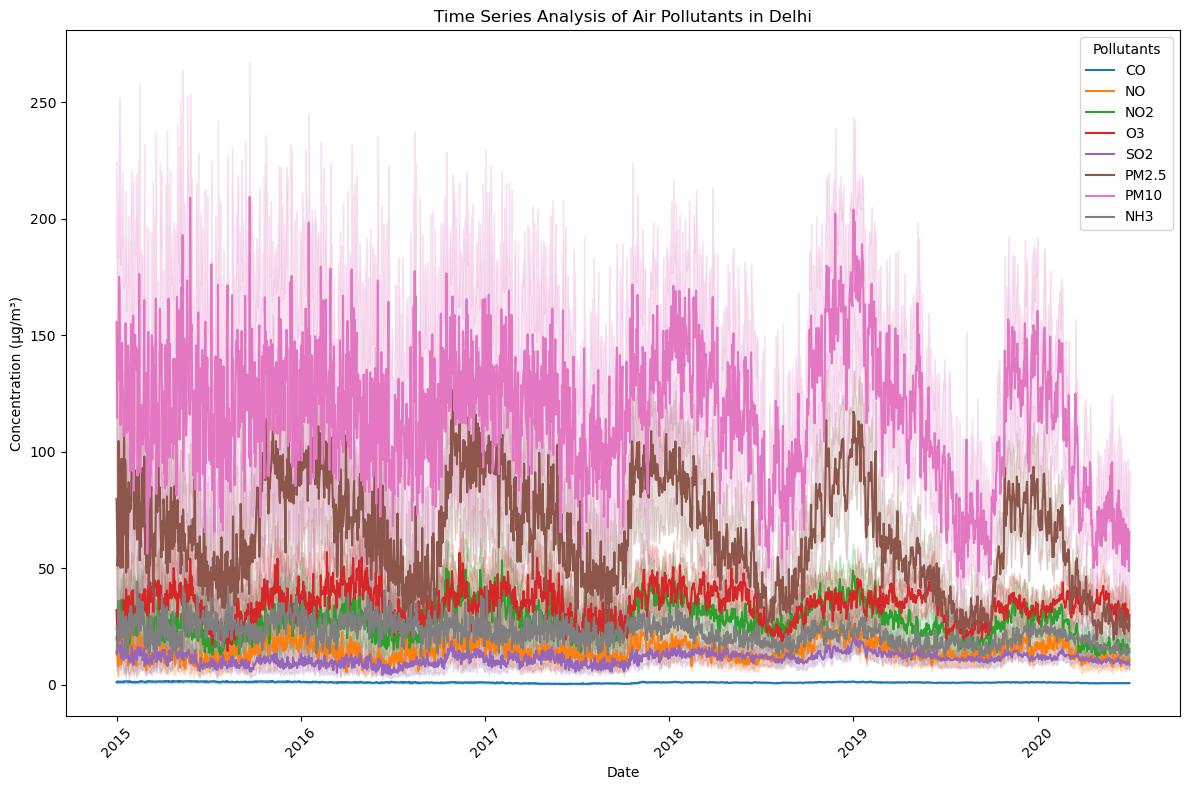

In [41]:
plt.figure(figsize=(12, 8))

pollutants = ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']
for pollutant in pollutants:
    sns.lineplot(data=df, x='date', y=pollutant, label=pollutant)

plt.title('Time Series Analysis of Air Pollutants in Delhi')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend(title='Pollutants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### AQI distribution by cities

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Ahmedabad'),
  Text(1, 0, 'Aizawl'),
  Text(2, 0, 'Amaravati'),
  Text(3, 0, 'Amritsar'),
  Text(4, 0, 'Bengaluru'),
  Text(5, 0, 'Bhopal'),
  Text(6, 0, 'Brajrajnagar'),
  Text(7, 0, 'Chandigarh'),
  Text(8, 0, 'Chennai'),
  Text(9, 0, 'Coimbatore'),
  Text(10, 0, 'Delhi'),
  Text(11, 0, 'Ernakulam'),
  Text(12, 0, 'Gurugram'),
  Text(13, 0, 'Guwahati'),
  Text(14, 0, 'Hyderabad'),
  Text(15, 0, 'Jaipur'),
  Text(16, 0, 'Jorapokhar'),
  Text(17, 0, 'Kochi'),
  Text(18, 0, 'Kolkata'),
  Text(19, 0, 'Lucknow'),
  Text(20, 0, 'Mumbai'),
  Text(21, 0, 'Patna'),
  Text(22, 0, 'Shillong'),
  Text(23, 0, 'Talcher'),
  Text(24, 0, 'Thiruvananthapuram'),
  Text(25, 0, 'Visakhapatnam')])

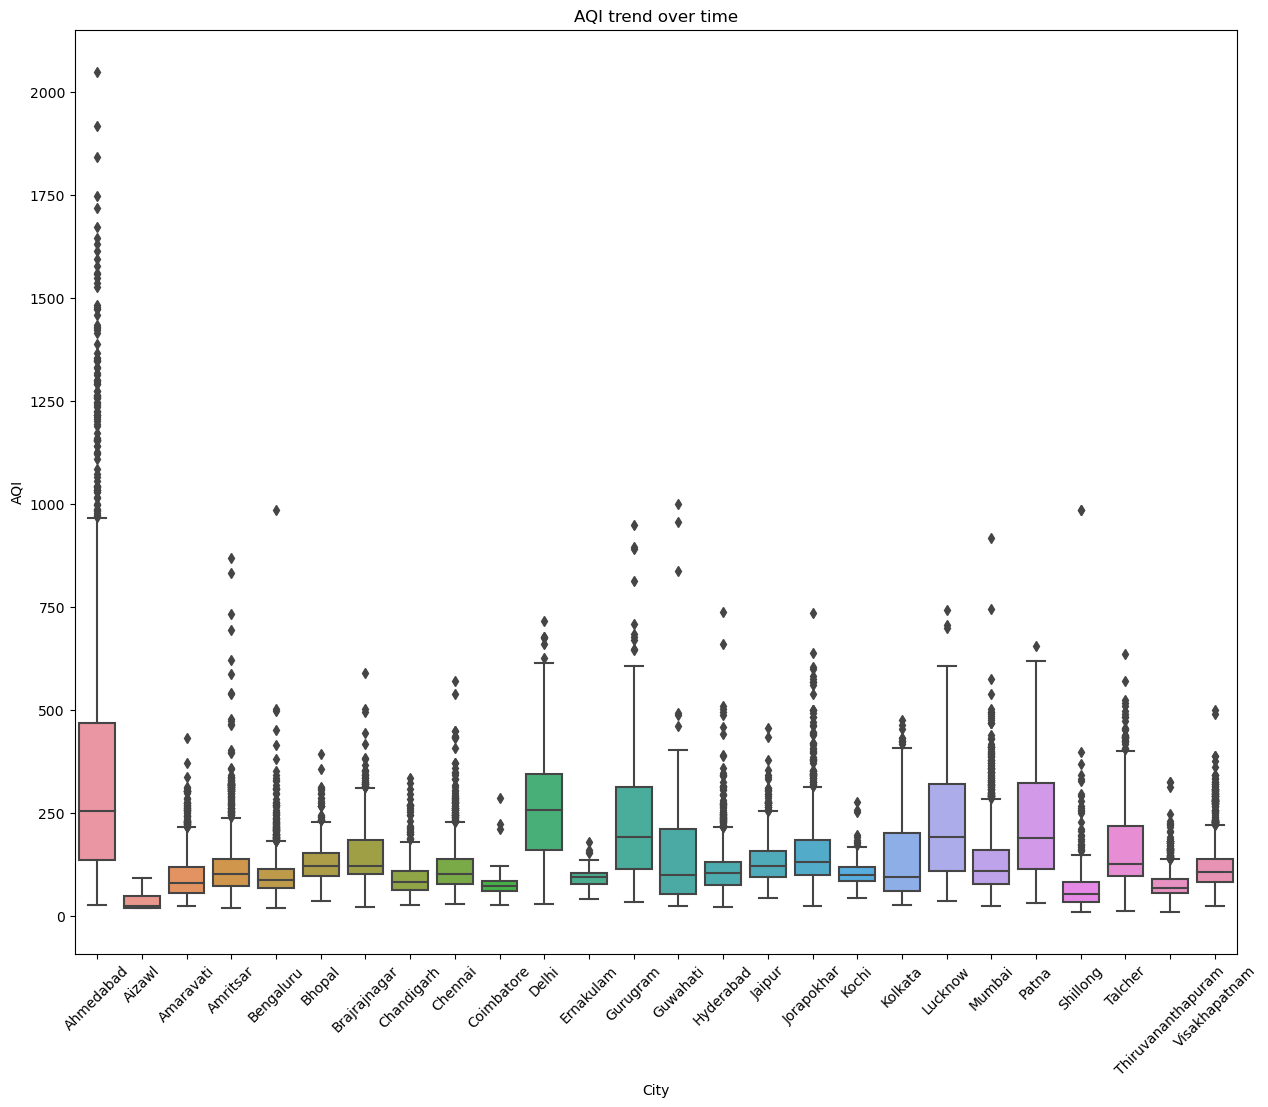

In [12]:
plt.figure(figsize=(15,12))
sns.boxplot(df,x='City',y='AQI')
plt.title('AQI trend over time')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'pollutant Distribution ')

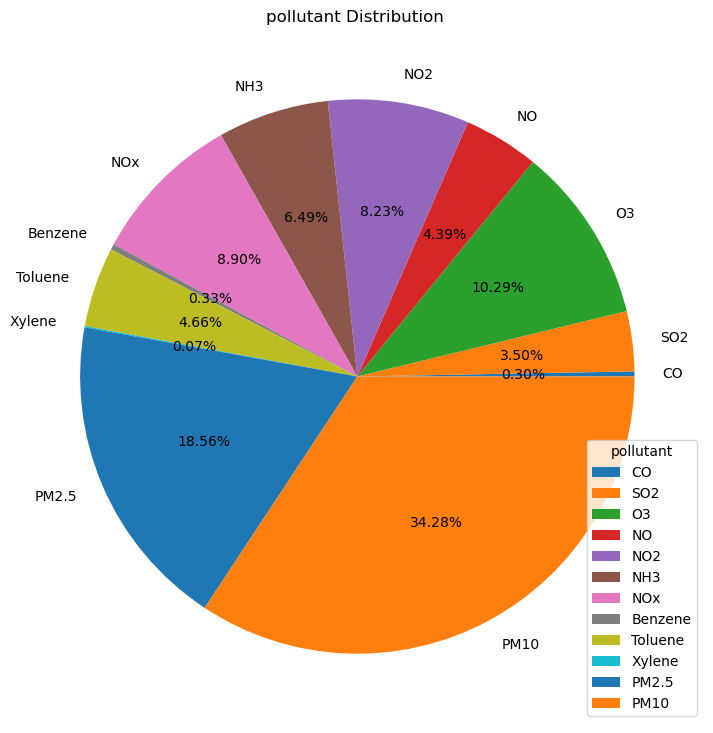

In [28]:
#Now, let’s have a look at the distribution of pollutants in the air quality :

# Define pollutants and their colors
plt.figure(figsize=(9,9))
pollutants=['CO','SO2','O3','NO','NO2','NH3','NOx','Benzene','Toluene','Xylene','PM2.5','PM10']
#calculate the sum of the pollutant concentration
total_concentration=df[pollutants].sum()
concentration_data=pd.DataFrame({'pollutant':pollutants,'concentration':total_concentration})
plt.pie(total_concentration,labels=pollutants,autopct='%0.2f%%')
plt.legend(title='pollutant',loc="lower right")
plt.title("pollutant Distribution ")

<AxesSubplot:xlabel='Xylene', ylabel='AQI'>

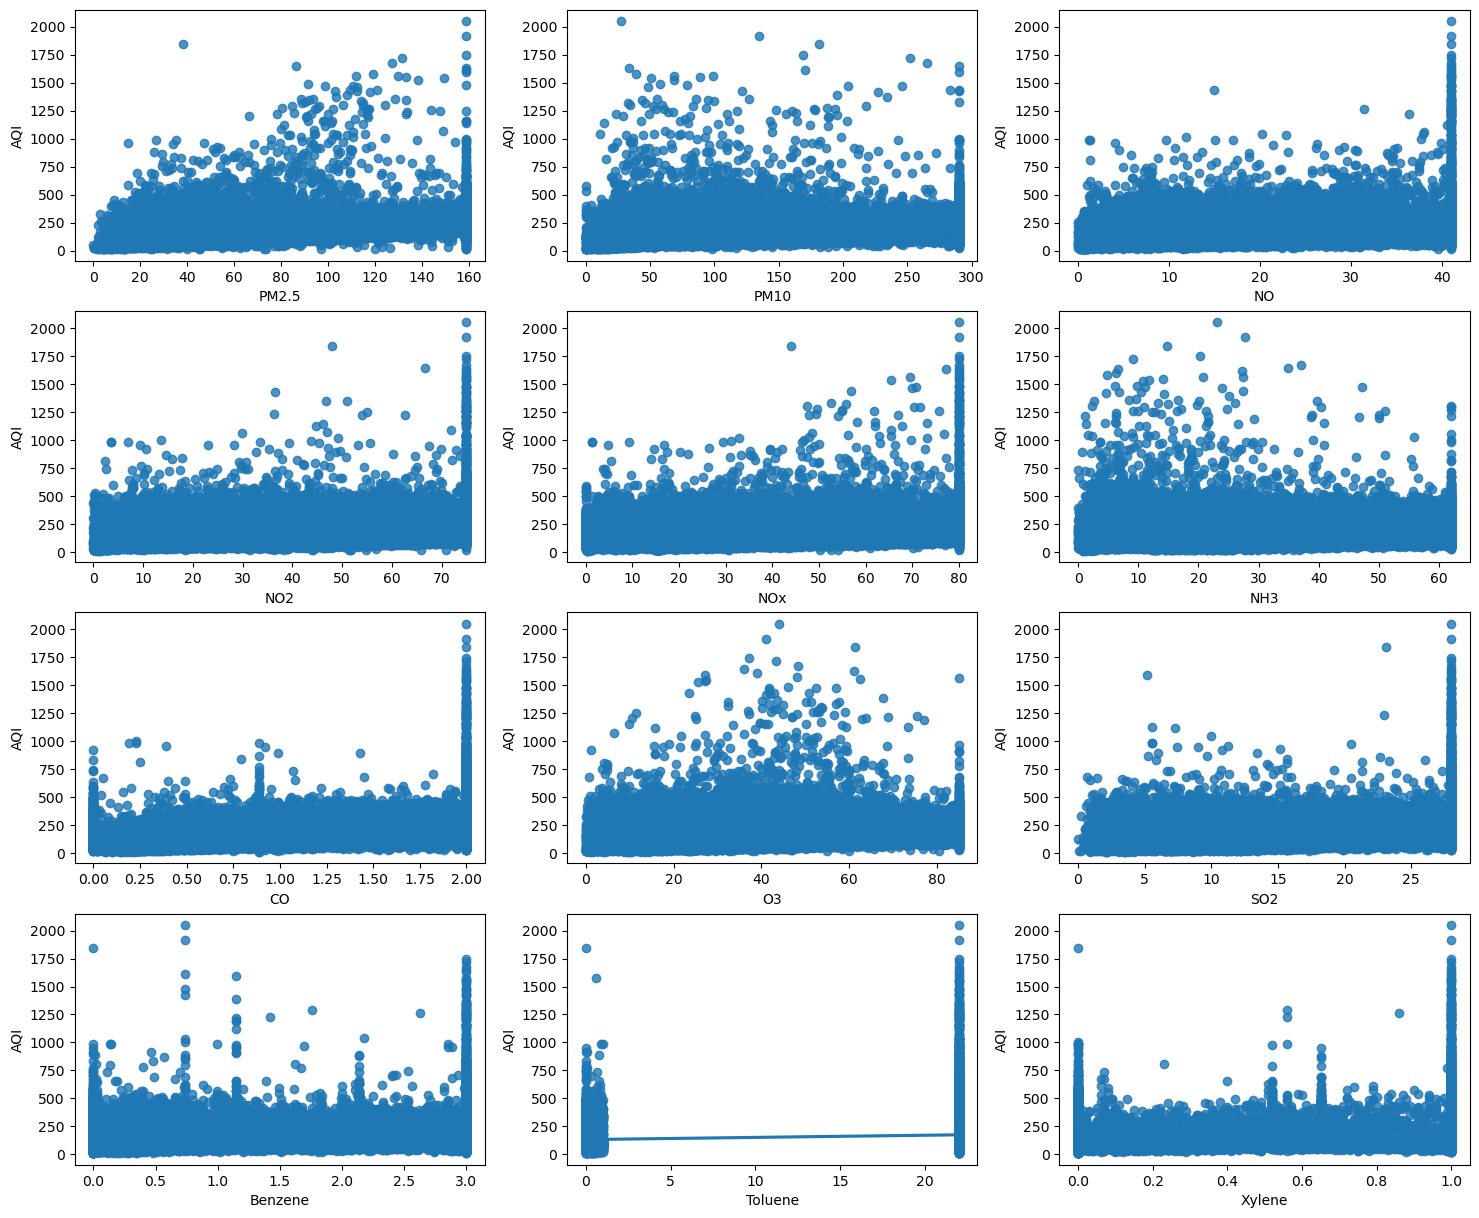

In [18]:
fig, axes = plt.subplots(4, 3, figsize=(18, 15))
sns.regplot(ax=axes[0,0],x='PM2.5',y='AQI',scatter=True,data=df)
sns.regplot(ax=axes[0,1],x='PM10',y='AQI',scatter=True,data=df)
sns.regplot(ax=axes[0,2],x='NO',y='AQI',scatter=True,data=df)
sns.regplot(ax=axes[1,0],x='NO2',y='AQI',scatter=True,data=df)
sns.regplot(ax=axes[1,1],x='NOx',y='AQI',scatter=True,data=df)
sns.regplot(ax=axes[1,2],x='NH3',y='AQI',scatter=True,data=df)
sns.regplot(ax=axes[2,0],x='CO',y='AQI',scatter=True,data=df)
sns.regplot(ax=axes[2,1],x='O3',y='AQI',scatter=True,data=df)
sns.regplot(ax=axes[2,2],x='SO2',y='AQI',scatter=True,data=df)
sns.regplot(ax=axes[3,0],x='Benzene',y='AQI',scatter=True,data=df)
sns.regplot(ax=axes[3,1],x='Toluene',y='AQI',scatter=True,data=df)
sns.regplot(ax=axes[3,2],x='Xylene',y='AQI',scatter=True,data=df)

### AQI Analysis of Delhi

Text(0.5, 1.0, 'AQI trend over time in delhi')

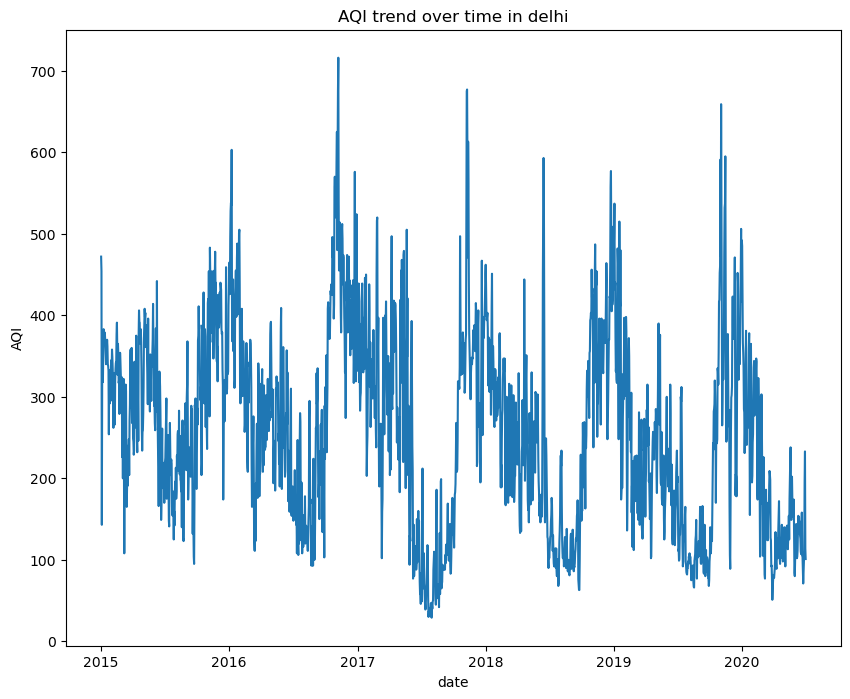

In [53]:
delhi_data=df.groupby('City').get_group('Delhi')
plt.figure(figsize=(10,8))
sns.lineplot(delhi_data,x='date',y='AQI')
plt.title('AQI trend over time in delhi')


### AQI Analysis of mumbai¶

Text(0.5, 1.0, 'AQI trend over time in mumbai')

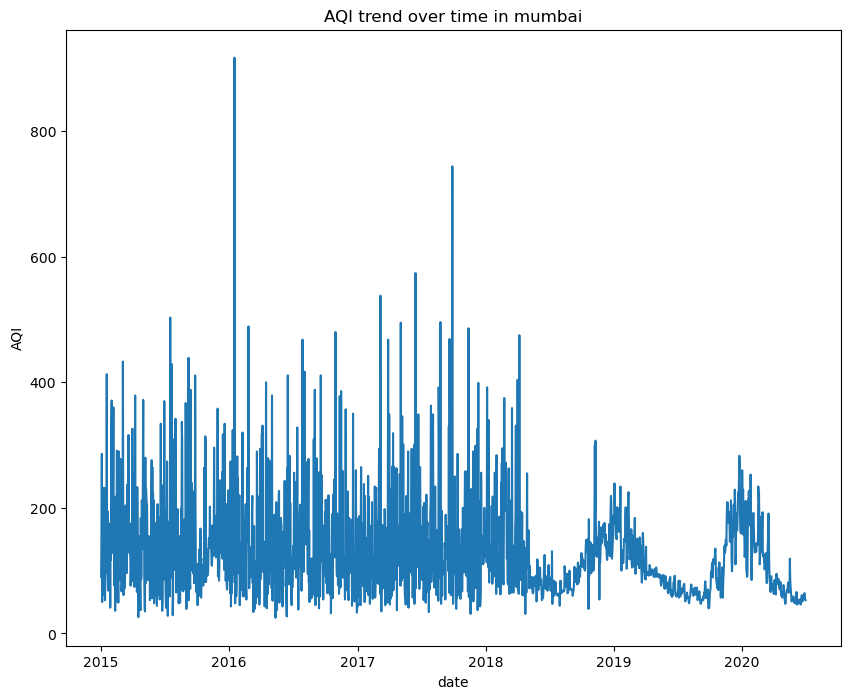

In [54]:
mumbai_data=df.groupby('City').get_group('Mumbai')
plt.figure(figsize=(10,8))
sns.lineplot(mumbai_data,x='date',y='AQI')
plt.title('AQI trend over time in mumbai')


###  AQI Analysis of kolkata¶

Text(0.5, 1.0, 'AQI trend over time in Kolkata')

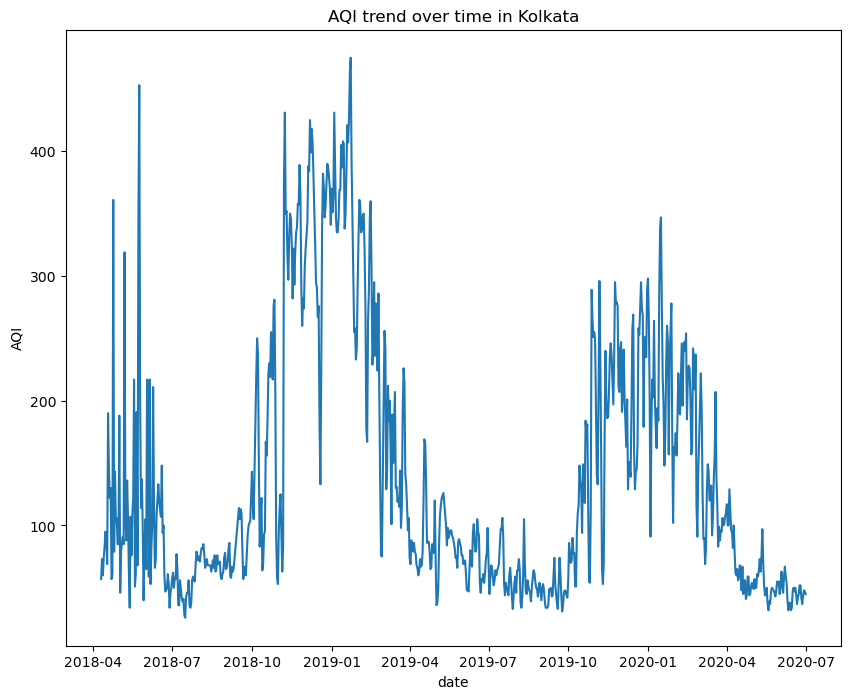

In [55]:
Kolkata_data=df.groupby('City').get_group('Kolkata')
plt.figure(figsize=(10,8))
sns.lineplot(Kolkata_data,x='date',y='AQI')
plt.title('AQI trend over time in Kolkata')


### AQI Analysis of chennai

Text(0.5, 1.0, 'AQI trend over time in Chennai')

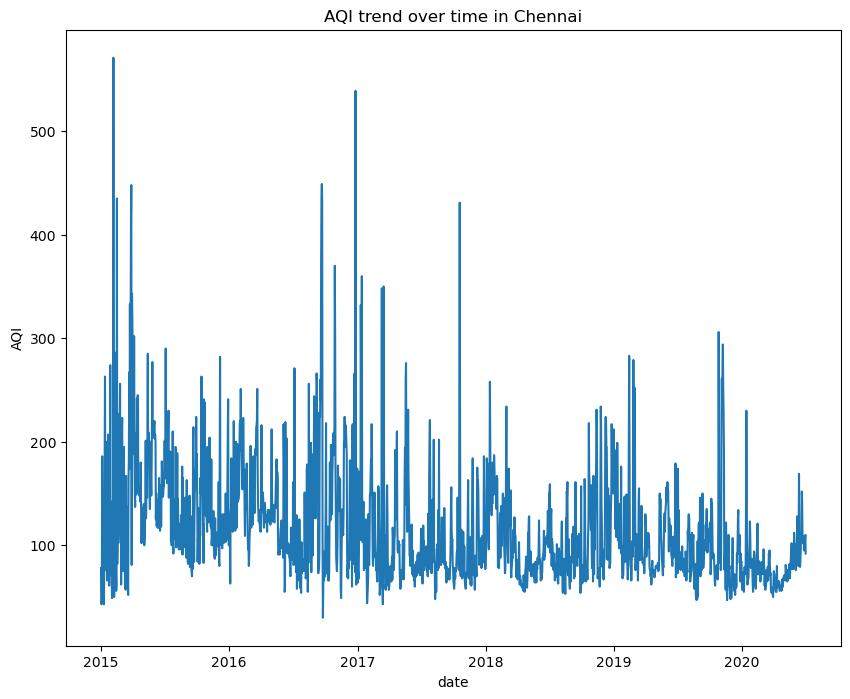

In [56]:
Chennai_data=df.groupby('City').get_group('Chennai')
plt.figure(figsize=(10,8))
sns.lineplot(Chennai_data,x='date',y='AQI')
plt.title('AQI trend over time in Chennai')


### Correlation  matrix 

Text(0.5, 1.0, 'Correlation Matrix ')

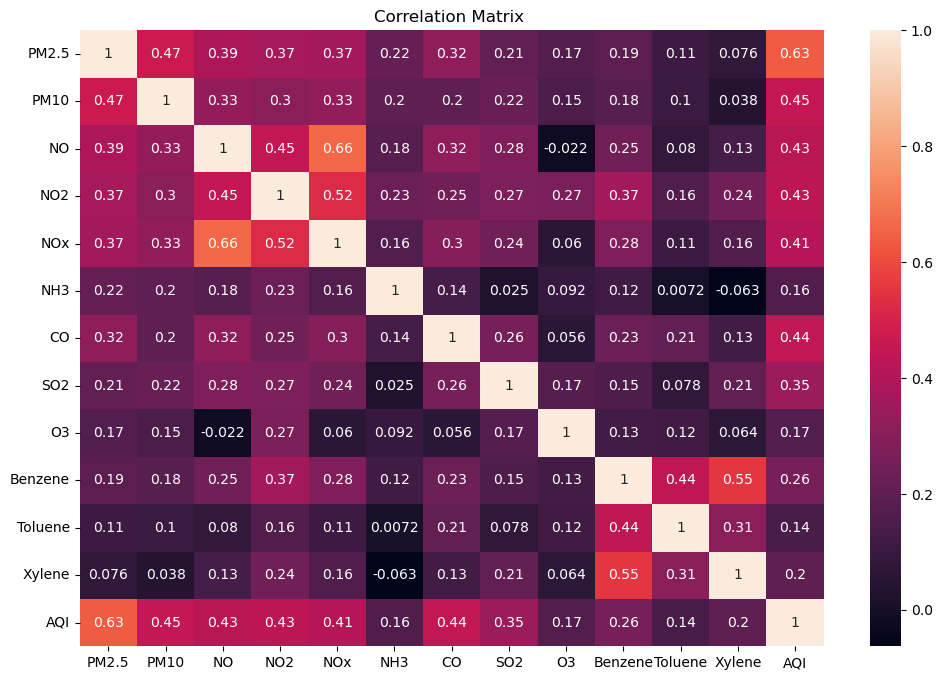

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix ')

## Split data into Train and Test  data

In [6]:
X=df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']]
Y=df['AQI']

In [7]:
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Data Transformation

In [8]:
scaler=StandardScaler()

In [9]:
X_train=scaler.fit_transform(X_train)

In [10]:
X_test=scaler.transform(X_test)

## model Selection

In [36]:
model={'lr':LinearRegression(),"Gb":GradientBoostingRegressor(),
'xg':XGBRegressor(),
'Dt':DecisionTreeRegressor()}

In [37]:
list1=[]
for i in model.values():
    s=cross_val_score(i,X,Y,cv=5,scoring='r2').mean()
    list1.append(s)
    

In [38]:
model_df=pd.DataFrame()
model_df['model']=['LinearReg','GradientBoosting','Xgboost','decisiontree']


In [39]:
model_df['score']=list1


In [40]:
model_df.head()

,model,score
0,LinearReg,0.486888
1,GradientBoosting,0.527458
2,Xgboost,0.454013
3,decisiontree,-0.060649


## model Buliding

#### Gradient Boosting

In [41]:
gb=GradientBoostingRegressor()
gb.fit(X_train,Y_train)

GradientBoostingRegressor()

In [42]:
pred=gb.predict(X_test)

In [43]:
print(r2_score(pred,y_test))

0.7060826181478116


In [11]:
parameter={'n_estimators':range(100,300,100),'learning_rate':np.arange(0.1,1,0.1),'subsample':range(1,10,1)}

In [12]:
model=GradientBoostingRegressor()

In [13]:
boostcv=GridSearchCV(model,param_grid=parameter,cv=5,scoring='neg_mean_squared_error',)

In [14]:
boostcv.fit(X_train,Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 317, in _check_params
    raise ValueError("subsample must be in (0,1] but was %r" % self.subsample)
ValueError: subsam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': range(100, 300, 100),
                         'subsample': range(1, 10)},
             scoring='neg_mean_squared_error')

In [15]:
pred1=boostcv.predict(X_test)
print('r2_score:',r2_score(pred1,y_test))

r2_score: 0.7553389802437691


In [64]:
pred_train=boostcv.predict(X_train)
print("r2_score:",r2_score(pred_train,Y_train))

r2_score: 0.7829583194030687


In [77]:
print('mean_absolute_error:' ,mean_absolute_error(pred1,y_test))
print('mean squared _error:',mean_squared_error(pred1,y_test))

mean_absolute_error: 31.41077266869325
mean squared _error: 3403.2205952630748


#### Decision Tree

In [50]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
pred2=dt.predict(X_test)

0.6677652124010947

In [68]:
pred_3=dt.predict(X_train)
print('r2_score:',r2_score(pred_3,Y_train))

r2_score: 0.999918637082996


In [66]:
print('r2_score:',r2_score(pred2,y_test))
print('mean_squared_error:',mean_absolute_error(pred2,y_test))
print('mean absolute _error:',mean_absolute_error(pred2,y_test))

r2_score: 0.6677652124010947
mean_squared_error: 38.974799874241214
mean absolute _error: 38.974799874241214


#### Linear Regreesion

In [51]:
from sklearn.linear_model import LinearRegression
ad=LinearRegression()
ad.fit(X_train,Y_train)

LinearRegression()

In [69]:
pred_4=ad.predict(X_test)

In [73]:
print("r2_score:",r2_score(pred_4,y_test))
print('mean_squared_error:',mean_absolute_error(pred_4,y_test))
print('mean absolute _error:',mean_absolute_error(pred_4,y_test))

r2_score: 0.2581778577128421
mean_squared_error: 49.21779562411952
mean absolute _error: 49.21779562411952


In [72]:
pred_5=ad.predict(X_train)
print("r2_score:",r2_score(pred_5,Y_train))

r2_score: 0.13827707829562508


### pickle the model


In [16]:
import pickle

In [17]:
pickle.dump(boostcv,open('model.pkl','wb'))

In [10]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [4]:
regmodel=pickle.load(open('model.pkl','rb'))
scaler=pickle.load(open('scaler.pkl','rb'))

In [5]:
data=[25,26,30,85,12,1,1.3,55,100,12,17,13]
data1=np.array(data).reshape(1,-1)